# Optimización de Operaciones Técnicas Aeropuerto

Contexto: El aeropuerto es una institución de transportación mundialmente conocida por garantizar la seguidad de los aviones para el traslado de personas y paqueteria via aerea. En este contexto y dado que los precios para este medio de transporte han bajado con el paso del tiempo, unido a la disminución del tiempo de viaje, en comparación con los medios terrestres y maritimos, lo han convertido en una de las principales opciones de uso por la población mundial. El aeropuerto de Ezeiza, Argentina ha estado en operación desde el 30 de abril de 1949, desde entonces, sus directivos y personal de operaciones, se esfuerzan por mejorar la calidad del servicio aereo, haciendo énfasis en la seguridad técnica de las naves que parten hacia otros destinos o arrivan a Buenos Aires. Para ello, la alta direccion de la entidad ha decidido utilizar la ciencia de datos con el ánimo de analizar y optimizar aspectos relacionados con fallas técnicas durante el despegue o aterrizaje, contribuyendo a minimizar el riesgo de materialización de accidentes aereos, que pueden causar la pérdida de vidas humanas, recursos materiales, financieros y deterioro de la imagen de las compañias aereas nacionales e internacionales.

Interés de la Investigación: El objetivo del estudio es obtener un modelo predictivo que permita pronosticar la existencia o no de riesgo de accidentes, de los distintos tipos de aviones que parten o arriban al aeropuerto de Ezeiza, tomando como origen las fallas técnicas reportadas por los responsables de las aeronaves. El dataset utilizado contiene los siguientes campos de interés:

- Fecha: Fecha de arribo o despegue de la nave.
- Hora: Hora de arribo o despegue de la nave.
- Clase de Vuelo: Si es Regular, No Regular, Privada Matricula Nacional o Privada Matricula Extranjera.
- Clasificacion de Vuelo: Si es Nacional o Internacional.
- Tipo de Movimiento: Si es Despegue o Aterrizaje.
- Origen: Ciudad donde despega la nave.
- Destino: Ciudad donde aterriza la nave.
- Nombre Aerolinea: Nombre de la aerolinea encargada de transportar pasajeros.
- Aeronave: Modelo de la aeronave.
- Falla Despegue: Cantidad de fallas técnicas reportadas durante el despegue de la aeronave.
- Falla Aterrizaje: Cantidad de fallas técnicas reportadas durante el aterrizaje de la aeronave.
- Riesgo Accidente: La categoria Si se utiliza cuando hay 3 o mas fallas totales reportadas. La categoria No se utiliza cuando hay hasta 2 fallas totales reportadas.
- Total de Fallas: Cantidad total de fallas reportadas (Falla Despegue + Falla Aterrizaje) por aeronave.

Fuente del Dataset: https://www.kaggle.com/datasets

# Exploración - Transformación del Dataset

1- Importación de Librería y Dataset:

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ds = pd.read_csv('aeropuerto.csv', sep=";")
ds

,Fecha,Hora,Numero_de_Pasajeros,Mayores,Menores,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente
0,10/1/2023,13,190,130,60,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
1,10/1/2023,9,400,300,100,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
2,10/1/2023,8,210,190,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
3,10/1/2023,7,210,190,20,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
4,10/1/2023,20,210,190,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,17/1/2023,14,150,100,50,Regular,Nacional,Despegue,CABA,Bariloche,Aero Caribbean,LEARJET LJ-45,11,0,Si
1995,17/1/2023,18,190,130,60,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1996,17/1/2023,19,190,130,60,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1997,17/1/2023,13,190,130,60,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si


2- Ver Estructura del Dataset.

In [2]:
ds.shape

(1999, 15)

3- Ver Tipo de Datos.

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fecha                1999 non-null   object
 1   Hora                 1999 non-null   int64 
 2   Numero_de_Pasajeros  1999 non-null   int64 
 3   Mayores              1999 non-null   int64 
 4   Menores              1999 non-null   int64 
 5   Clase_de_Vuelo       1999 non-null   object
 6   Clasificacion_Vuelo  1999 non-null   object
 7   Tipo_de_Movimiento   1999 non-null   object
 8   Origen               1999 non-null   object
 9   Destino              1999 non-null   object
 10  Aerolinea_Nombre     1999 non-null   object
 11  Aeronave             1999 non-null   object
 12  Falla_Despegue       1999 non-null   int64 
 13  Falla_Aterrizaje     1999 non-null   int64 
 14  Riesgo Accidente     1999 non-null   object
dtypes: int64(6), object(9)
memory usage: 234.4+ KB


In [4]:
ds.dtypes

Fecha                  object
Hora                    int64
Numero_de_Pasajeros     int64
Mayores                 int64
Menores                 int64
Clase_de_Vuelo         object
Clasificacion_Vuelo    object
Tipo_de_Movimiento     object
Origen                 object
Destino                object
Aerolinea_Nombre       object
Aeronave               object
Falla_Despegue          int64
Falla_Aterrizaje        int64
Riesgo Accidente       object
dtype: object

In [5]:
ds.columns

Index(['Fecha', 'Hora', 'Numero_de_Pasajeros', 'Mayores', 'Menores',
       'Clase_de_Vuelo', 'Clasificacion_Vuelo', 'Tipo_de_Movimiento', 'Origen',
       'Destino', 'Aerolinea_Nombre', 'Aeronave', 'Falla_Despegue',
       'Falla_Aterrizaje', 'Riesgo Accidente'],
      dtype='object')

4- Eliminar Columnas en el Dataset.

Nota: Se toma la desición de eliminar las columnas Numero_de_Pasajeros, Mayores y Menores porque se considera que no son significativas para el estudio.

In [6]:
ds2 = ds.drop(['Numero_de_Pasajeros', 'Mayores', 'Menores'], axis=1)
ds2

,Fecha,Hora,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente
0,10/1/2023,13,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
1,10/1/2023,9,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
2,10/1/2023,8,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
3,10/1/2023,7,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
4,10/1/2023,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,17/1/2023,14,Regular,Nacional,Despegue,CABA,Bariloche,Aero Caribbean,LEARJET LJ-45,11,0,Si
1995,17/1/2023,18,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1996,17/1/2023,19,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1997,17/1/2023,13,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si


5- Conocer los Registros Principales.

In [7]:
ds2.head(20)

,Fecha,Hora,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente
0,10/1/2023,13,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
1,10/1/2023,9,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
2,10/1/2023,8,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
3,10/1/2023,7,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
4,10/1/2023,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
5,10/1/2023,18,Regular,Internacional,Despegue,CABA,Chile,Austral Lineas Aereas,EMBRAER E-190,1,0,No
6,10/1/2023,17,Regular,Nacional,Aterrizaje,Jujuy,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
7,10/1/2023,2,Regular,Nacional,Aterrizaje,Jujuy,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
8,10/1/2023,15,Regular,Nacional,Aterrizaje,Jujuy,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
9,10/1/2023,5,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No


6- Transformación de Columnas.

In [9]:
ds2['Fecha'] = pd.to_datetime(ds2['Fecha'])
ds2.dtypes

Fecha                  datetime64[ns]
Hora                            int64
Clase_de_Vuelo                 object
Clasificacion_Vuelo            object
Tipo_de_Movimiento             object
Origen                         object
Destino                        object
Aerolinea_Nombre               object
Aeronave                       object
Falla_Despegue                  int64
Falla_Aterrizaje                int64
Riesgo Accidente               object
dtype: object

In [10]:
ds2

,Fecha,Hora,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente
0,2023-10-01,13,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
1,2023-10-01,9,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
2,2023-10-01,8,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
3,2023-10-01,7,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No
4,2023-10-01,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-01-17,14,Regular,Nacional,Despegue,CABA,Bariloche,Aero Caribbean,LEARJET LJ-45,11,0,Si
1995,2023-01-17,18,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1996,2023-01-17,19,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si
1997,2023-01-17,13,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si


7- Agregar Nueva Columna.

In [11]:
ds2['Total de Fallas'] = ds2['Falla_Despegue'] + ds2['Falla_Aterrizaje']
ds2

,Fecha,Hora,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente,Total de Fallas
0,2023-10-01,13,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No,1
1,2023-10-01,9,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No,1
2,2023-10-01,8,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No,1
3,2023-10-01,7,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,No,1
4,2023-10-01,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-01-17,14,Regular,Nacional,Despegue,CABA,Bariloche,Aero Caribbean,LEARJET LJ-45,11,0,Si,11
1995,2023-01-17,18,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si,12
1996,2023-01-17,19,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si,12
1997,2023-01-17,13,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,Si,12


8- Descripción Estadística de los Datos Numérico.

In [12]:
ds2.describe()

,Hora,Falla_Despegue,Falla_Aterrizaje,Total de Fallas
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,13.461731,3.674837,3.098549,6.773387
std,5.555202,4.063599,3.705607,2.731233
min,0.000000,0.000000,0.000000,1.000000
25%,9.000000,0.000000,0.000000,5.000000
50%,14.000000,0.000000,1.000000,7.000000
75%,18.000000,7.000000,6.000000,9.000000
max,23.000000,11.000000,12.000000,12.000000


Para la columna Falla_Despegue:

- Como promedio (media) se tiene 4 fallas reportadas por despegue.
- El valor minimo de falla reportada en el despegue es 0.
- El valor maximo de falla reportada en el despegue es 11.
- La desviacion estandar dio 4.0, lo que indica que el valor promedio de fallas reportadas en el despegue, puede variar +-4.0.
- El valor de la mediana (50%) es 0 falla reportada en el despegue. Este resultado se encuentra distante con respecto a la media obtenida (4, valor redondeado), lo que permite concluir que existen valores atipicos en el conjunto de datos analizados.
- El 75% de los valores de las fallas de despegue reportadas, se encuentran por debajo de 7, mientras que el 25% se encuentran por encima de 7.

Para la columna Falla_Aterrizaje:

- Como promedio (media) se tiene 3 fallas reportadas por aterrizaje.
- El valor minimo de falla reportada en el aterrizaje es 0.
- El valor maximo de falla reportada en el aterrizaje es 12.
- La desviacion estandar dio 3.7, lo que indica que el valor promedio de fallas reportadas en el aterrizaje, puede variar +-3.7.
- El valor de la mediana (50%) es 1 falla reportada en el aterrizaje. Este resultado se encuentra distante con respecto a la media obtenida (3, valor redondeado), lo que permite concluir que existen valores atipicos en el conjunto de datos analizados.
- El 75% de los valores de las fallas de aterrizaje reportadas, se encuentran por debajo de 6, mientras que el 25% se encuentran por encima de 6.

Para la columna Total de Fallas:

- Como promedio (media) se tiene 6.7 fallas totales reportadas (despegue-aterrizaje) por vuelo.
- El valor minimo del total de fallas reportadas es 1 por vuelo.
- El valor maximo del total de fallas reportadas es 12 por vuelo.
- La desviacion estandar dio 2.7, lo que indica que el valor promedio de fallas totales reportadas por vuelo, puede variar +-2.7.
- El valor de la mediana (50%) es 7 fallas totales reportadas. Este resultado se encuentra cercano con respecto a la media obtenida (6.7), lo que permite concluir que existen valores atipicos en el conjunto de datos analizados, pero no son abundantes.
- El 75% de los valores de las fallas totales por vuelo reportadas, se encuentran por debajo de 9, mientras que el 25% se encuentran por encima de 9.

9- Valores de Interes para Campos Categóricos.

In [13]:
frecuencia_de_vuelo = ds2['Aeronave'].value_counts()

In [14]:
aeronaves_con_mas_vuelos = frecuencia_de_vuelo.head(5)
aeronaves_con_mas_vuelos

AIRBUS A-340       387
LEARJET LJ-45      335
BEECHCRAFT BE90    254
CESSNA C-150       254
BOEING B-737       224
Name: Aeronave, dtype: int64

In [15]:
aeronaves_con_menos_vuelos = frecuencia_de_vuelo.tail(5)
aeronaves_con_menos_vuelos

BOEING B-737      224
AEROSPACE GLF4    174
EMBRAER E-190     137
CESSNA C-210      120
PIPER PA-28       114
Name: Aeronave, dtype: int64

In [16]:
frecuencia_de_fallas_despegue = ds2['Falla_Despegue'].value_counts()

In [17]:
frec_mayor_cant_fallas_despegue = frecuencia_de_fallas_despegue.head(5)
frec_mayor_cant_fallas_despegue

0    1007
6     164
7     161
9     134
8     131
Name: Falla_Despegue, dtype: int64

In [18]:
frec_menor_cant_fallas_despegue = frecuencia_de_fallas_despegue.tail(5)
frec_menor_cant_fallas_despegue

5    94
3    25
2    24
4    24
1    18
Name: Falla_Despegue, dtype: int64

In [19]:
frecuencia_de_fallas_aterrizaje = ds2['Falla_Aterrizaje'].value_counts()

In [20]:
frec_mayor_cant_fallas_aterrizaje = frecuencia_de_fallas_aterrizaje.head(5)
frec_mayor_cant_fallas_aterrizaje

0    992
6    136
5    122
7    109
9    109
Name: Falla_Aterrizaje, dtype: int64

In [21]:
frec_menor_cant_fallas_aterrizaje = frecuencia_de_fallas_aterrizaje.tail(5)
frec_menor_cant_fallas_aterrizaje

10    73
1     67
2     60
11    46
12    26
Name: Falla_Aterrizaje, dtype: int64

In [22]:
frecuencia_de_fallas_total = ds2['Total de Fallas'].value_counts()

In [23]:
frec_mayor_cant_fallas_total = frecuencia_de_fallas_total.head(5)
frec_mayor_cant_fallas_total

6    300
7    270
9    243
5    216
8    215
Name: Total de Fallas, dtype: int64

In [24]:
frec_menor_cant_fallas_total = frecuencia_de_fallas_total.tail(5)
frec_menor_cant_fallas_total

4     116
3     108
1      85
2      84
12     26
Name: Total de Fallas, dtype: int64

In [25]:
frecuencia_de_despegue_aterrizaje = ds2['Tipo_de_Movimiento'].value_counts()
frecuencia_de_despegue_aterrizaje

Aterrizaje    1007
Despegue       992
Name: Tipo_de_Movimiento, dtype: int64

10- Limpieza de los Datos.

In [26]:
ds2.isnull().sum()

Fecha                  0
Hora                   0
Clase_de_Vuelo         0
Clasificacion_Vuelo    0
Tipo_de_Movimiento     0
Origen                 0
Destino                0
Aerolinea_Nombre       0
Aeronave               0
Falla_Despegue         0
Falla_Aterrizaje       0
Riesgo Accidente       0
Total de Fallas        0
dtype: int64

In [27]:
ds2.isna().sum()

Fecha                  0
Hora                   0
Clase_de_Vuelo         0
Clasificacion_Vuelo    0
Tipo_de_Movimiento     0
Origen                 0
Destino                0
Aerolinea_Nombre       0
Aeronave               0
Falla_Despegue         0
Falla_Aterrizaje       0
Riesgo Accidente       0
Total de Fallas        0
dtype: int64

Conclusión:

- No se observan valores nulos en los campos, ni tampoco valores que pudieran considerarse errores.

# Visualización del Dataset

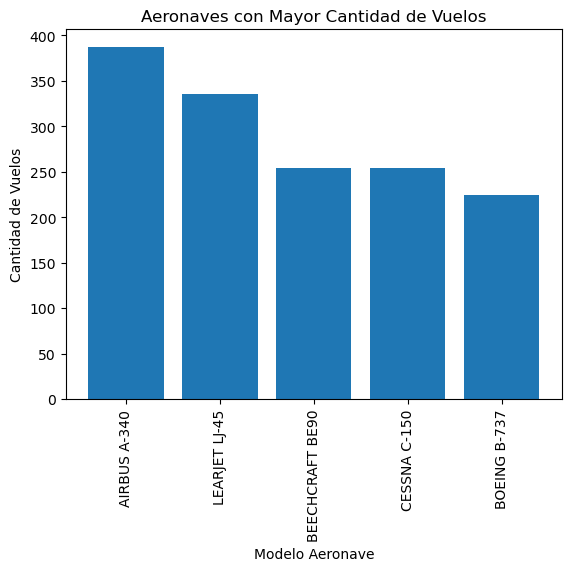

In [28]:
plt.bar(aeronaves_con_mas_vuelos.index, aeronaves_con_mas_vuelos.values)
plt.xlabel('Modelo Aeronave')
plt.ylabel('Cantidad de Vuelos')
plt.title('Aeronaves con Mayor Cantidad de Vuelos')
plt.xticks(rotation=90)
plt.show()

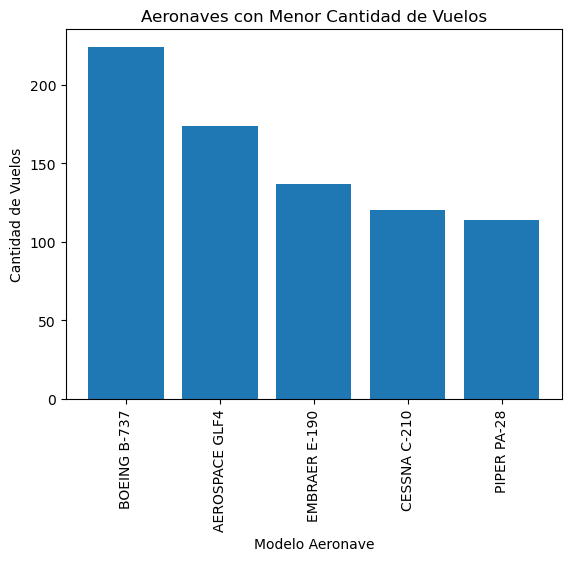

In [29]:
plt.bar(aeronaves_con_menos_vuelos.index, aeronaves_con_menos_vuelos.values)
plt.xlabel('Modelo Aeronave')
plt.ylabel('Cantidad de Vuelos')
plt.title('Aeronaves con Menor Cantidad de Vuelos')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- La aeronave con mayor cantidad de vuelos es AIRBUS A-340 con 387 vuelos, seguido por LEARJET LJ-45 con 335 vuelos.
- La aeronave con menor cantidad de vuelos es PIPER PA-28 con 114, seguido por CESSNA C-210 con 120 vuelos.

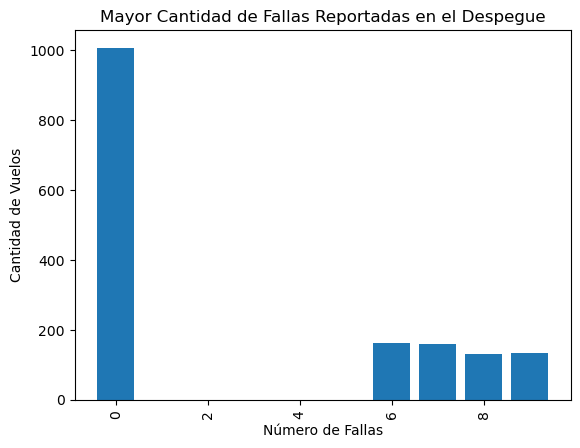

In [30]:
plt.bar(frec_mayor_cant_fallas_despegue.index, frec_mayor_cant_fallas_despegue.values)
plt.xlabel('Número de Fallas')
plt.ylabel('Cantidad de Vuelos')
plt.title('Mayor Cantidad de Fallas Reportadas en el Despegue')
plt.xticks(rotation=90)
plt.show()

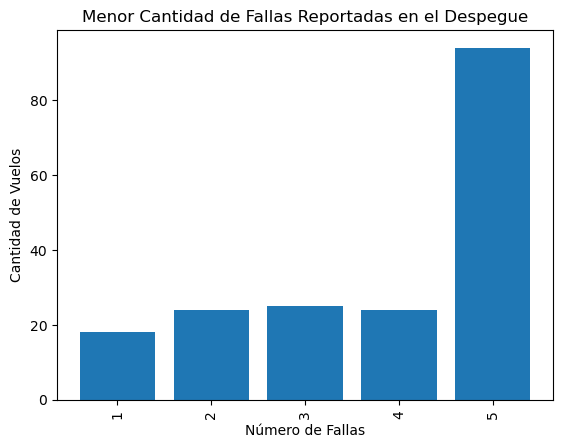

In [31]:
plt.bar(frec_menor_cant_fallas_despegue.index, frec_menor_cant_fallas_despegue.values)
plt.xlabel('Número de Fallas')
plt.ylabel('Cantidad de Vuelos')
plt.title('Menor Cantidad de Fallas Reportadas en el Despegue')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- Con respecto a la mayor cantidad de vuelos que reportaron fallas en el despegue: 1007 vuelos reportaron 0 fallas, mientras que 164 vuelos reportaron 6 fallas en el despegue.
- Con respecto a la menor cantidad de vuelos que reportaron fallas en el despegue: 18 vuelos reportaron 1 falla, mientras que 24 vuelos reportaron 4 fallas en el despegue.

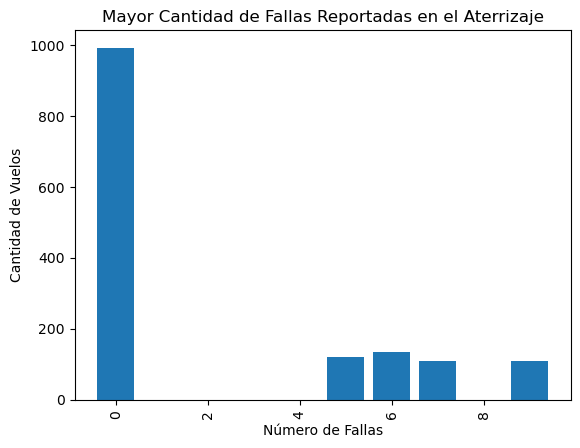

In [32]:
plt.bar(frec_mayor_cant_fallas_aterrizaje.index, frec_mayor_cant_fallas_aterrizaje.values)
plt.xlabel('Número de Fallas')
plt.ylabel('Cantidad de Vuelos')
plt.title('Mayor Cantidad de Fallas Reportadas en el Aterrizaje')
plt.xticks(rotation=90)
plt.show()

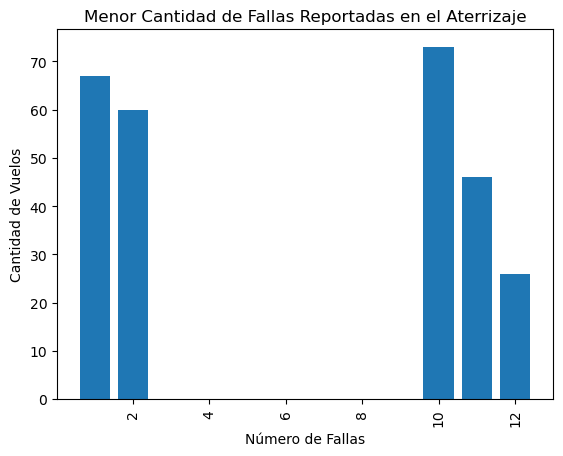

In [33]:
plt.bar(frec_menor_cant_fallas_aterrizaje.index, frec_menor_cant_fallas_aterrizaje.values)
plt.xlabel('Número de Fallas')
plt.ylabel('Cantidad de Vuelos')
plt.title('Menor Cantidad de Fallas Reportadas en el Aterrizaje')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- Con respecto a la mayor cantidad de vuelos que reportaron fallas en el aterrizaje: 992 vuelos reportaron 0 falla, mientras que 136 vuelos reportaron 6 fallas en el aterrizaje.
- Con respecto a la menor cantidad de vuelos que reportaron fallas en el aterrizaje: 26 vuelos reportaron 12 falla, mientras que 46 vuelos reportaron 11 fallas en el aterrizaje.

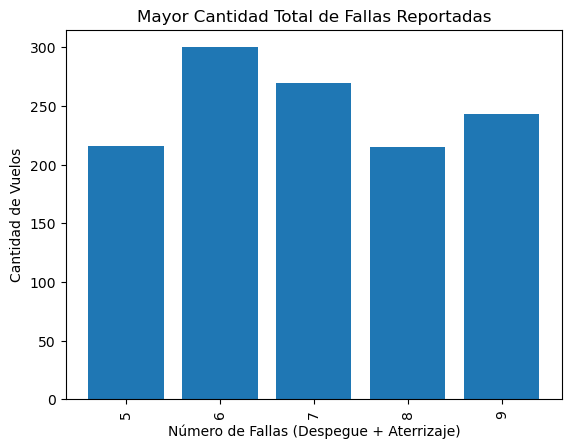

In [34]:
plt.bar(frec_mayor_cant_fallas_total.index, frec_mayor_cant_fallas_total.values)
plt.xlabel('Número de Fallas (Despegue + Aterrizaje)')
plt.ylabel('Cantidad de Vuelos')
plt.title('Mayor Cantidad Total de Fallas Reportadas')
plt.xticks(rotation=90)
plt.show()

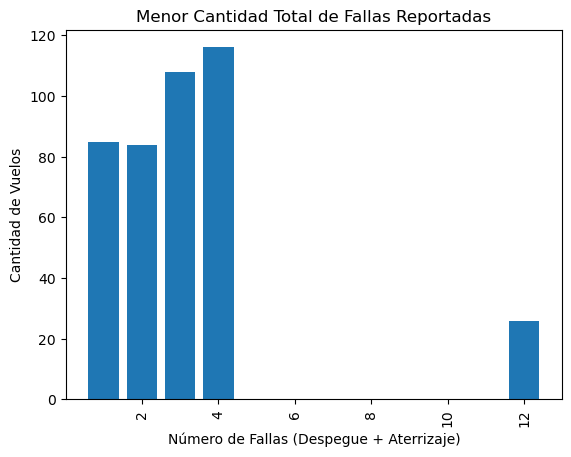

In [35]:
plt.bar(frec_menor_cant_fallas_total.index, frec_menor_cant_fallas_total.values)
plt.xlabel('Número de Fallas (Despegue + Aterrizaje)')
plt.ylabel('Cantidad de Vuelos')
plt.title('Menor Cantidad Total de Fallas Reportadas')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- Con respecto a la mayor cantidad de vuelos que reportaron fallas totales (despegue + aterrizaje): 300 vuelos reportaron 6, mientras que 270 reportaron 7 fallas totales.
- Con respecto a la menor cantidad de vuelos que reportaron fallas totales (despegue + aterrizaje): 26 vuelos reportaron 12, mientras que 84 vuelos reportaron 2 fallas totales.

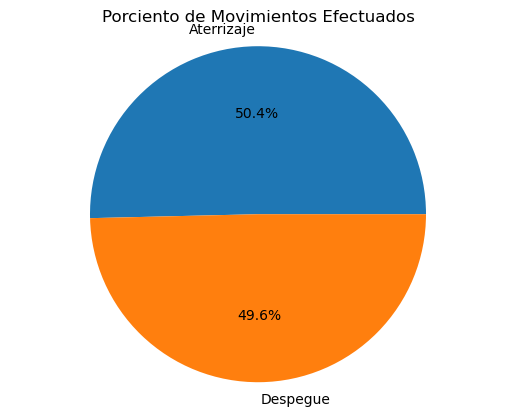

In [36]:
porciento = frecuencia_de_despegue_aterrizaje / len(ds2)*100
plt.pie(porciento.values, labels=porciento.index, autopct='%1.1f%%')
plt.title('Porciento de Movimientos Efectuados')
plt.axis('equal')
plt.show()

Conclusiones:

- Con respecto a la cantidad de aterrizajes reportados: 1007 aterrizajes (50.4%).
- Con respecto a la cantidad de despegues reportados: 992 despegues (49.6%).

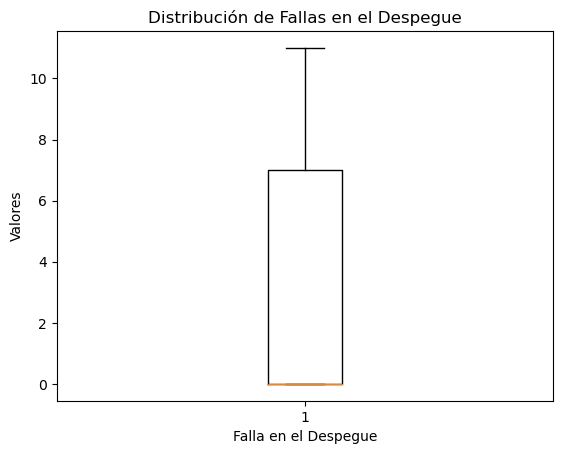

In [37]:
plt.boxplot(ds2['Falla_Despegue'])
plt.xlabel('Falla en el Despegue')
plt.ylabel('Valores')
plt.title('Distribución de Fallas en el Despegue')
plt.show()

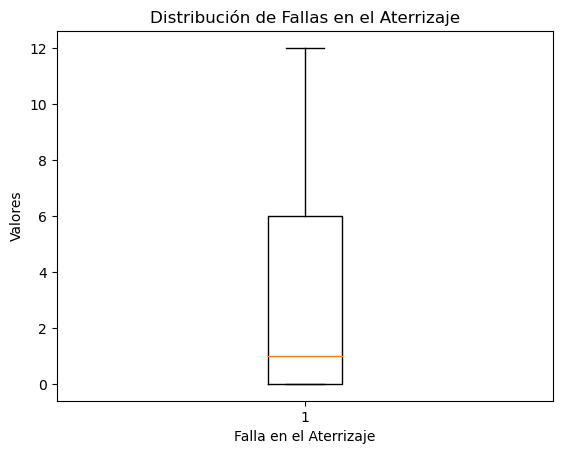

In [38]:
plt.boxplot(ds2['Falla_Aterrizaje'])
plt.xlabel('Falla en el Aterrizaje')
plt.ylabel('Valores')
plt.title('Distribución de Fallas en el Aterrizaje')
plt.show()

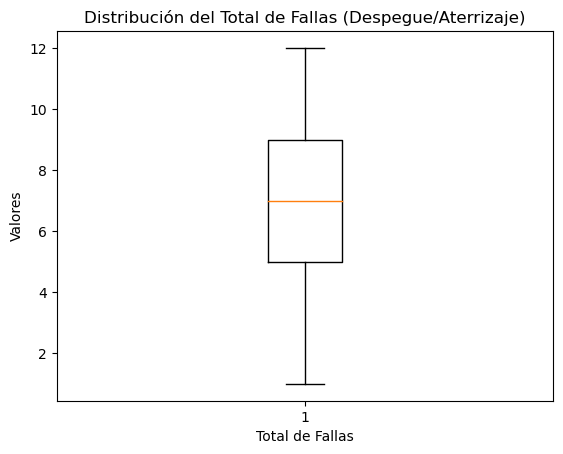

In [39]:
plt.boxplot(ds2['Total de Fallas'])
plt.xlabel('Total de Fallas')
plt.ylabel('Valores')
plt.title('Distribución del Total de Fallas (Despegue/Aterrizaje)')
plt.show()

Conclusiones:

- En la distribucion de fallas en el despegue, aterrizaje y total, no se observan valores atipicos.

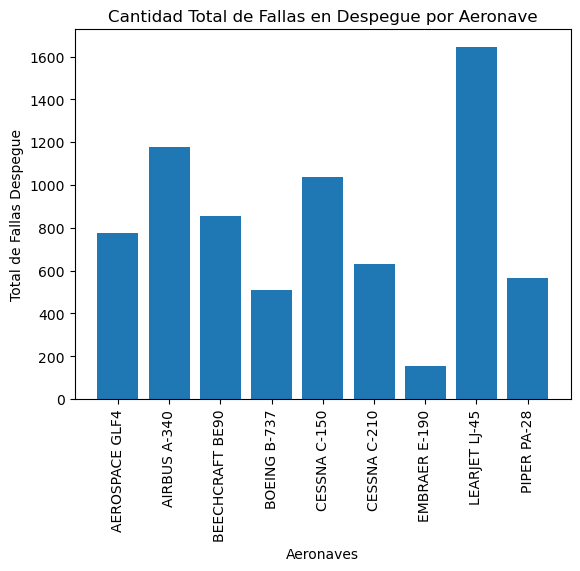

In [40]:
suma_fallas_por_aeronave_despegue = ds2.groupby('Aeronave')['Falla_Despegue'].sum()
plt.bar(suma_fallas_por_aeronave_despegue.index, suma_fallas_por_aeronave_despegue.values)
plt.xlabel('Aeronaves')
plt.ylabel('Total de Fallas Despegue')
plt.title('Cantidad Total de Fallas en Despegue por Aeronave')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 1644 fallas en el despegue.

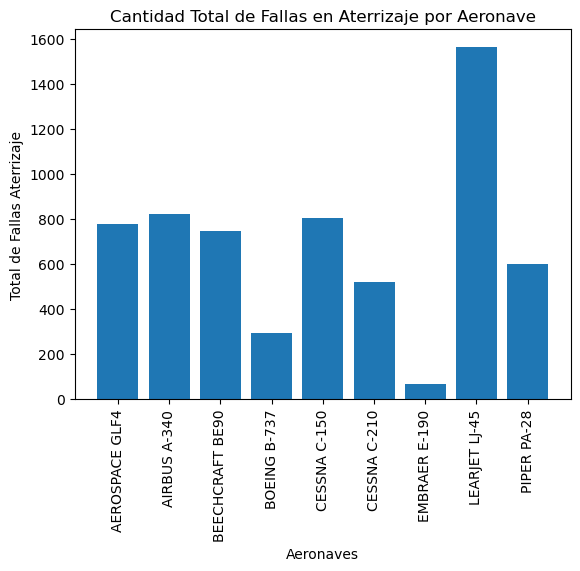

In [41]:
suma_fallas_por_aeronave_aterrizaje = ds2.groupby('Aeronave')['Falla_Aterrizaje'].sum()
plt.bar(suma_fallas_por_aeronave_aterrizaje.index, suma_fallas_por_aeronave_aterrizaje.values)
plt.xlabel('Aeronaves')
plt.ylabel('Total de Fallas Aterrizaje')
plt.title('Cantidad Total de Fallas en Aterrizaje por Aeronave')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 1563 fallas en el aterrizaje.

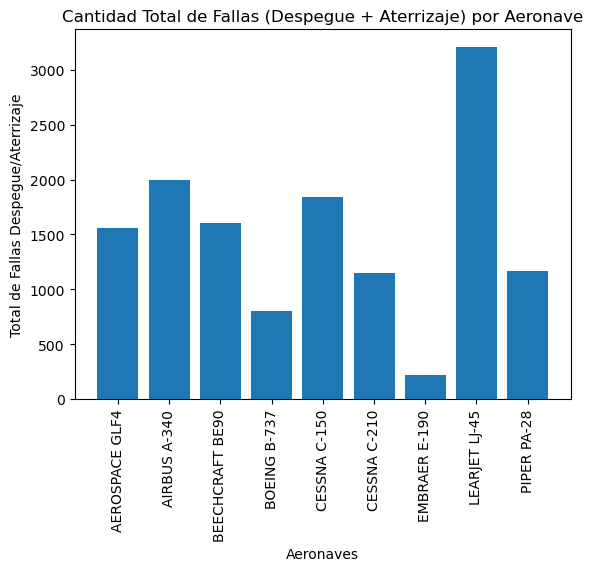

In [42]:
suma_fallas_por_aeronave_despegue_aterrizaje = ds2.groupby('Aeronave')['Total de Fallas'].sum()
plt.bar(suma_fallas_por_aeronave_despegue_aterrizaje.index, suma_fallas_por_aeronave_despegue_aterrizaje.values)
plt.xlabel('Aeronaves')
plt.ylabel('Total de Fallas Despegue/Aterrizaje')
plt.title('Cantidad Total de Fallas (Despegue + Aterrizaje) por Aeronave')
plt.xticks(rotation=90)
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 3207 fallas totales (aterrizaje + despegue).

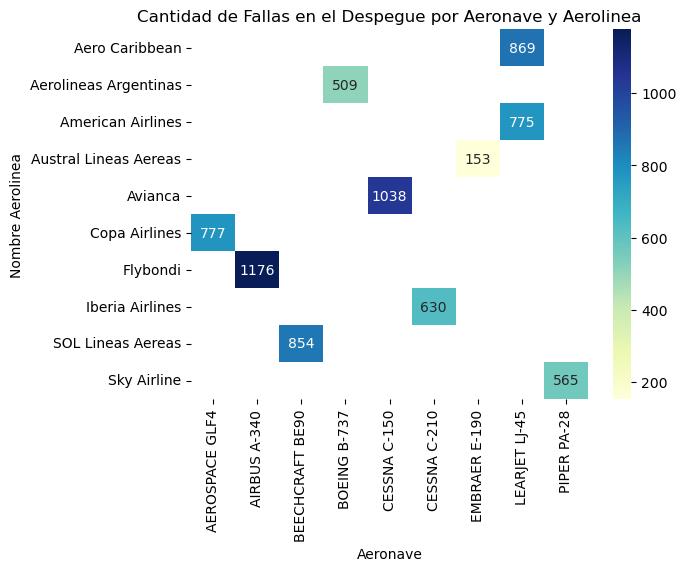

In [43]:
matriz_correlacion = ds2.groupby(['Aerolinea_Nombre','Aeronave'])['Falla_Despegue'].sum().unstack()
sns.heatmap(data=matriz_correlacion, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Aeronave')
plt.ylabel('Nombre Aerolinea')
plt.title('Cantidad de Fallas en el Despegue por Aeronave y Aerolinea')
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 1644 fallas en el despegue, de las cuales 775 fallas pertenecen a la aerolinea American Airlines, mientras que 869 fallas pertenecen a Aero-Caribbean.

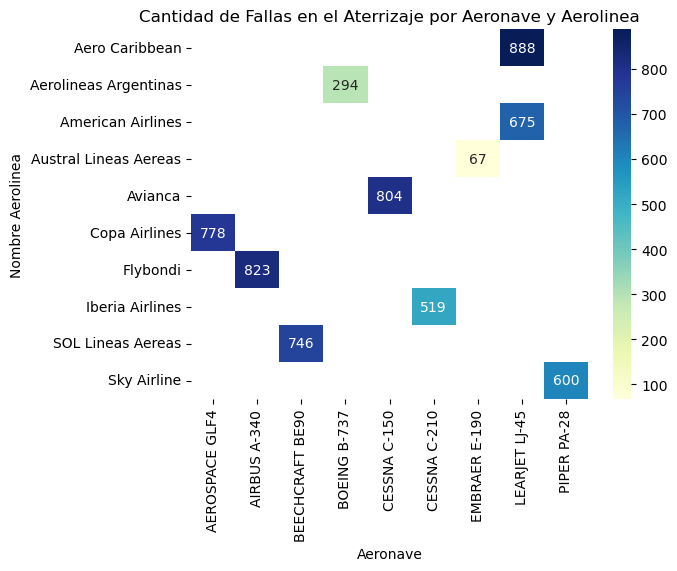

In [44]:
matriz_correlacion = ds2.groupby(['Aerolinea_Nombre','Aeronave'])['Falla_Aterrizaje'].sum().unstack()
sns.heatmap(data=matriz_correlacion, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Aeronave')
plt.ylabel('Nombre Aerolinea')
plt.title('Cantidad de Fallas en el Aterrizaje por Aeronave y Aerolinea')
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 1563 fallas en el aterrizaje, de las cuales 675 fallas pertenecen a la aerolinea American Airlines, mientras que 888 fallas pertenecen a Aero Caribbean.

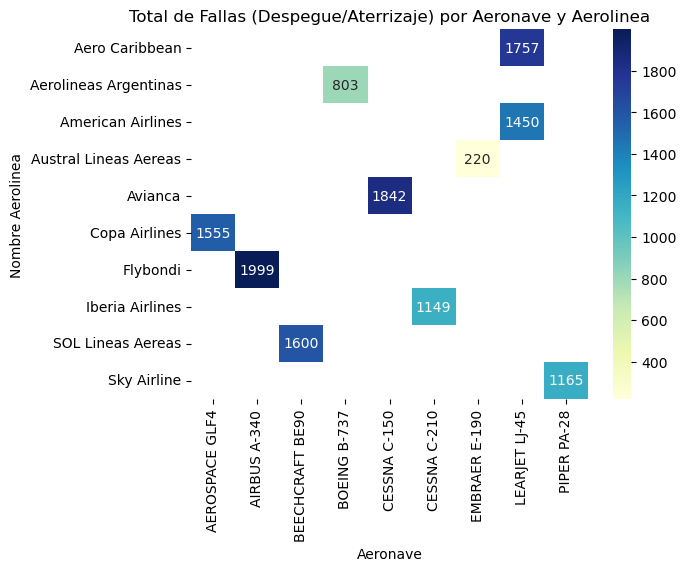

In [45]:
matriz_correlacion = ds2.groupby(['Aerolinea_Nombre','Aeronave'])['Total de Fallas'].sum().unstack()
sns.heatmap(data=matriz_correlacion, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Aeronave')
plt.ylabel('Nombre Aerolinea')
plt.title('Total de Fallas (Despegue/Aterrizaje) por Aeronave y Aerolinea')
plt.show()

Conclusiones:

- La aeronave LEARJET LJ-45 suma 3207 fallas totales (aterrizaje + despegue), de las cuales 1450 fallas pertenecen a la aerolinea American Airlines, mientras que 1757 fallas pertenecen a Aero Caribbean.

In [46]:
#Convertimos los valores del campo Riesgo Accidente del dataset de categoricos a numericos para ser graficados.

ds2['Riesgo Accidente'] = ds2['Riesgo Accidente'].map({'Si':1, 'No':0})
ds2

,Fecha,Hora,Clase_de_Vuelo,Clasificacion_Vuelo,Tipo_de_Movimiento,Origen,Destino,Aerolinea_Nombre,Aeronave,Falla_Despegue,Falla_Aterrizaje,Riesgo Accidente,Total de Fallas
0,2023-10-01,13,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,0,1
1,2023-10-01,9,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,0,1
2,2023-10-01,8,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,0,1
3,2023-10-01,7,Regular,Nacional,Despegue,CABA,Bariloche,Austral Lineas Aereas,EMBRAER E-190,1,0,0,1
4,2023-10-01,20,Regular,Internacional,Aterrizaje,Uruguay,CABA,Austral Lineas Aereas,EMBRAER E-190,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023-01-17,14,Regular,Nacional,Despegue,CABA,Bariloche,Aero Caribbean,LEARJET LJ-45,11,0,1,11
1995,2023-01-17,18,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,1,12
1996,2023-01-17,19,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,1,12
1997,2023-01-17,13,Regular,Nacional,Aterrizaje,Salta,CABA,Aero Caribbean,LEARJET LJ-45,0,12,1,12


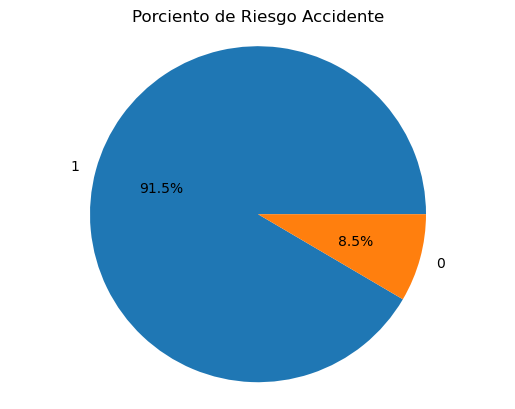

In [47]:
frecuencia_de_riesgo_accidente = ds2['Riesgo Accidente'].value_counts()
porciento2 = frecuencia_de_riesgo_accidente / len(ds2)*100
plt.pie(porciento2.values, labels=porciento2.index, autopct='%1.1f%%')
plt.title('Porciento de Riesgo Accidente')
plt.axis('equal')
plt.show()

Conclusiones:

- Existe un porciento muy elevado de riesgo accidente. Lo que indica que un gran número de aeronaves reportan fallas totales igual a 3 o mayor.

# Modelado

In [48]:
riesgo_de_accid = ds2['Riesgo Accidente']
total_fallas = ds2['Total de Fallas']

In [49]:
#Se distribuyen los datos para entrenamiento y prueba. 70% de datos para entrenamiento y 30% de datos para pruebas.

riesgo_entrena, riesgo_prueba, fallas_entrena, fallas_prueba = \
    train_test_split(riesgo_de_accid,
                    total_fallas,
                    test_size=0.30)

In [50]:
#Se crean arreglos de 2D para cada una de las variables de entrenamiento y prueba.
riesgo_entrena_2D = np.array(riesgo_entrena).reshape(-1, 1)
riesgo_prueba_2D = np.array(riesgo_prueba).reshape(-1, 1)
fallas_entrena_2D = np.array(fallas_entrena).reshape(-1, 1)
fallas_prueba_2D = np.array(fallas_prueba).reshape(-1, 1)

In [51]:
#Los arreglos 2D de las variables dependientes, deben modificar su forma a (n, )

riesgo_entrena_2D_y = riesgo_entrena_2D.ravel()
riesgo_prueba_2D_y = riesgo_prueba_2D.ravel()

In [52]:
#Se genera el modelo de regresion logistica y se ajusta a los datos de entrenamiento. Adicional, con np.set_printoptions
#suprimimos la notacion cientifica del resultado, logrando que se presente en su forma natural.

modelo = LogisticRegression().fit(fallas_entrena_2D, riesgo_entrena_2D_y)
np.set_printoptions(suppress=True)

In [53]:
#Se utilizan los datos de prueba en el modelo obtenido.

print(modelo.predict(fallas_prueba_2D))

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 

In [54]:
len(fallas_prueba_2D)

600

Conclusiones:

- De los 600 vuelos incluidos en los datos de prueba, 49 vuelos no presentan riesgo de accidente, mientras que 551 vuelos si presentan riesgo de accidente.

In [55]:
#Determinamos la probabilidad de que los vuelos incluidos en los datos de prueba, experimenten riesgo de accidente o no.

print(modelo.predict_proba(fallas_prueba_2D))

[[0.         1.        ]
 [0.99925724 0.00074276]
 [0.         1.        ]
 ...
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]]


Conclusiones:

- Se obtiene la probabilidad de que un vuelo experimente riesgo de accidente o no.
- Analizando el 1er vuelo, tenemos que el modelo predictivo dio valor 1, si observamos los valores de probabilidad para este caso, obtenemos como primer valor 0, lo que indica que efectivamente, la probabilidad de que no exista riesgo de accidente es cero, por otro lado el segundo valor 1, indica que es muy probable que exista riesgo de accidente.

In [58]:
#Evaluamos el modelo de regresion logistica obtenido.

eval_modelo = modelo.score(fallas_prueba_2D, riesgo_prueba_2D_y)
eval_modelo

1.0

Conclusiones:

- El resultado de la evaluacion del modelo indica que se ajusta al 100% de los datos de prueba.

In [59]:
#Obteniendo los valores de b0 y b1.

print(modelo.intercept_, modelo.coef_)

[-12.1462655] [[4.94187744]]


In [60]:
#Creamos una funcion logistica vectorial (ufuncs)

logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1)

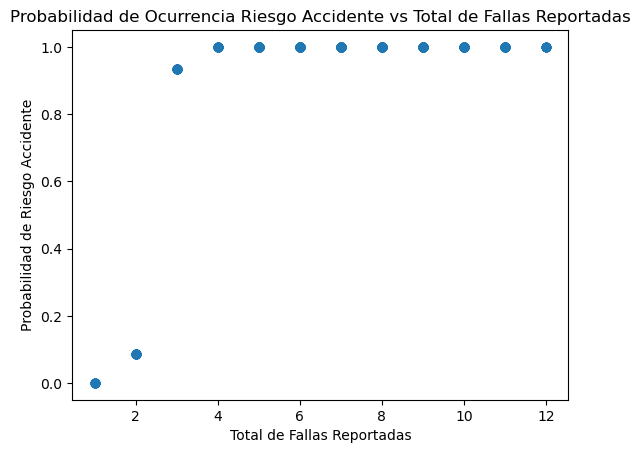

In [61]:
#Graficamos la funcion logistica en base a los datos de prueba de la variable independiente(x),
#valores de intercepto y coeficiente del modelo.

plt.scatter(fallas_prueba_2D, logistica(-12.47866806, 5.05262684, fallas_prueba_2D))
plt.xlabel('Total de Fallas Reportadas')
plt.ylabel('Probabilidad de Riesgo Accidente')
plt.title('Probabilidad de Ocurrencia Riesgo Accidente vs Total de Fallas Reportadas')
plt.show()

Conclusiones:

- Para 0, 1 y 2 fallas totales reportadas, la probabilidad de riesgo accidente es baja, mientras que para valores de fallas igual a 3 o mayor, la probabilidad de riesgo accidente es alta.

# Implementación del Modelo con Nuevos Datos.

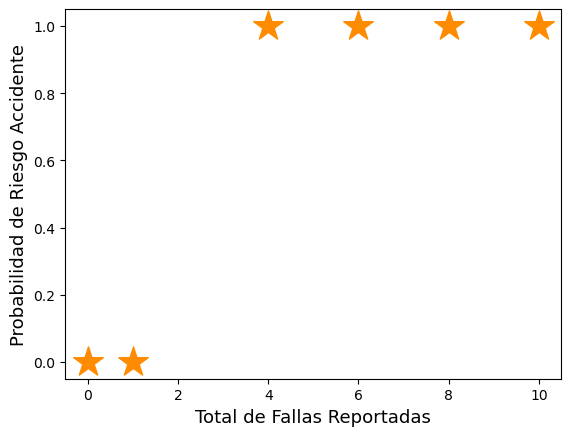

In [62]:
#Graficamos la probabilidad de riesgo accidente para 6 nuevos vuelos.

new_fly = [6, 1, 8, 0, 4, 10]

probabilidades = logistica(-12.47866806, 5.05262684, new_fly)

plt.scatter(new_fly, probabilidades, marker="*", c="darkorange", s=500)
plt.xlabel('Total de Fallas Reportadas', fontsize=13.0)
plt.ylabel('Probabilidad de Riesgo Accidente', fontsize=13.0)
plt.show()

In [65]:
#Convertimos la variable new_fly en un arreglo 2D.

new_fly_2D = np.array([new_fly]).reshape(-1, 1)

In [66]:
#Determinacion de la probabilidad de que los vuelos experimenten riesgo de accidente o no.

print(modelo.predict_proba(new_fly_2D))

[[0.00000002 0.99999998]
 [0.99925724 0.00074276]
 [0.         1.        ]
 [0.99999469 0.00000531]
 [0.00048969 0.99951031]
 [0.         1.        ]]


Conclusiones:

- Como se observa, para los vuelos 2 y 4, la probabilidad de ocurrencia de riesgo accidente es muy baja, puesto que reportan un total de fallas de 1 y 0 respectivamente.
- Para el resto de los vuelos, la probabilidad de ocurrencia de riesgo accidente es muy alta, puesto que reportan valores de fallas totales superior a 3 unidades.
- Lo anterior es respaldado mediante el calculo numerico de la probabilidad de ocurrencia de riesgo accidente para cada uno de los vuelos. En el 1er vuelo, por ejemplo, el primer valor obtenido 0.00000002, indica que la probabilidad de que no exista riesgo accidente es casi 0, mientras el segundo valor 0.99999998, indica que la probabilidad de que exista riesgo accidente es casi 1.

In [67]:
#Utilizamos el modelo de regresion logistica con los nuevos datos.

print(modelo.predict(new_fly_2D))

[1 0 1 0 1 1]


Conclusiones:

- El resultado del modelo de regresion logistica se encuentra alineado con el calculo de la probabilidad de riesgo accidente para los 6 nuevos vuelos, puesto que para las aeronaves 2 y 4, no existe riesgo accidente, sin embargo para el resto si.